# Microsoft Data Science Bootcamp
## Module 1: An Introduction to Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

print(os.listdir("./data"))

['Housing.csv', 'Lemonade.csv', 'mnist', 's1045.ima.gz', 'Trades.csv']


In [2]:
df = pd.read_csv('./data/Lemonade.csv')
print("\nRow count:",  df.shape[0])
print("\nColumn count:",  df.shape[1])
print("\nAny null/missing values?", df.isnull().values.any())
print("\nNon-null count by column:\n", df.count(),  sep="")


Row count: 365

Column count: 7

Any null/missing values? False

Non-null count by column:
Date           365
Day            365
Temperature    365
Rainfall       365
Flyers         365
Price          365
Sales          365
dtype: int64


In [3]:
print(df.columns)

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')


In [4]:
print(df.head())
print(df.tail())

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0  01/01/2017     Sunday         27.0      2.00      15    0.3     10
1  02/01/2017     Monday         28.9      1.33      15    0.3     13
2  03/01/2017    Tuesday         34.5      1.33      27    0.3     15
3  04/01/2017  Wednesday         44.1      1.05      28    0.3     17
4  05/01/2017   Thursday         42.4      1.00      33    0.3     18
           Date        Day  Temperature  Rainfall  Flyers  Price  Sales
360  27/12/2017  Wednesday         42.7      1.00      33    0.3     19
361  28/12/2017   Thursday         37.8      1.25      32    0.3     16
362  29/12/2017     Friday         39.5      1.25      17    0.3     15
363  30/12/2017   Saturday         30.9      1.43      22    0.3     13
364  31/12/2017     Sunday         15.1      2.50       9    0.3      7


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # change Date column from type str to type datetime
print(df.head())
print(df.tail())

        Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0 2017-01-01     Sunday         27.0      2.00      15    0.3     10
1 2017-01-02     Monday         28.9      1.33      15    0.3     13
2 2017-01-03    Tuesday         34.5      1.33      27    0.3     15
3 2017-01-04  Wednesday         44.1      1.05      28    0.3     17
4 2017-01-05   Thursday         42.4      1.00      33    0.3     18
          Date        Day  Temperature  Rainfall  Flyers  Price  Sales
360 2017-12-27  Wednesday         42.7      1.00      33    0.3     19
361 2017-12-28   Thursday         37.8      1.25      32    0.3     16
362 2017-12-29     Friday         39.5      1.25      17    0.3     15
363 2017-12-30   Saturday         30.9      1.43      22    0.3     13
364 2017-12-31     Sunday         15.1      2.50       9    0.3      7


In [6]:
print(type(df))                        # pandas.core.frame.DataFrame
date = df['Date'].values               # numpy.ndarray of umpy.datetime64 type elements
day = df['Day'].values                 # numpy.ndarray of str type elements
temperature = df['Temperature'].values # numpy.ndarray of numpy.float64 type elements
rainfall    = df['Rainfall'].values    # numpy.ndarray of numpy.float64 type elements
flyers      = df['Flyers'].values      # numpy.ndarray of numpy.int64 type elements
price       =  df['Price'].values      # numpy.ndarray of numpy.float64 type elements
sales       = df['Sales'].values       # numpy.ndarray of numpy.int64 type elements
print(date.size, day.size, temperature.size, rainfall.size, flyers.size, price.size, sales.size)

<class 'pandas.core.frame.DataFrame'>
365 365 365 365 365 365 365


## Sales Statistics

In [7]:
print("Sales min:",  sales.min())
print("Sales max:",  sales.max())
print("Sales mean:", sales.mean())

Sales min: 7
Sales max: 43
Sales mean: 25.323287671232876


In [8]:
print("Sales min:",    np.min(sales))
print("Sales max:",    np.max(sales))
print("Sales mean:",   np.mean(sales))
print("Sales median:", np.median(sales))
print("Sales std:",    np.std(sales))
print("Sales var:",    np.var(sales))

Sales min: 7
Sales max: 43
Sales mean: 25.323287671232876
Sales median: 25.0
Sales std: 6.884139415539732
Sales var: 47.39137549258772


In [9]:
from scipy import stats
sales_mode = stats.mode(sales)
print("Sales stats mode:", sales_mode)
print("Frequency of the value 25 in sales:", np.count_nonzero(sales == 25)) # returns the frequency of the value in the array

Sales stats mode: ModeResult(mode=array([25], dtype=int64), count=array([35]))
Frequency of the value 25 in sales: 35


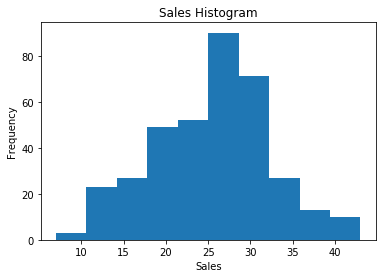

In [10]:
# histogram groups data into bins (value ranges) and displays the number of values that fall into each range as height
plt.title('Sales Histogram')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.hist(sales)
plt.show()

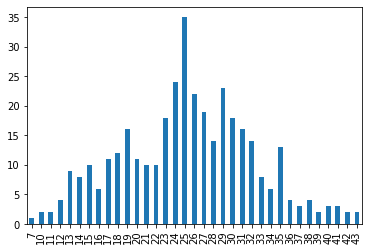

In [11]:
# distribution of daily sales
value_counts = df['Sales'].value_counts()       # return a Series containing unique values and their associated counts
sorted_value_counts = value_counts.sort_index() # sort the value counts series in ascending order of value counts
sorted_value_counts.plot.bar()                  # plot the sorted value count Series as a bar plot using matplotlib

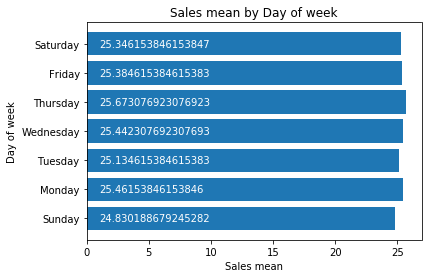

In [12]:
sales_by_day_of_week = [
    df.loc[df.Day == 'Sunday'].Sales.mean(), 
    df.loc[df.Day == 'Monday'].Sales.mean(),
    df.loc[df.Day == 'Tuesday'].Sales.mean(),
    df.loc[df.Day == 'Wednesday'].Sales.mean(),
    df.loc[df.Day == 'Thursday'].Sales.mean(),
    df.loc[df.Day == 'Friday'].Sales.mean(),
    df.loc[df.Day == 'Saturday'].Sales.mean()]
plt.title('Sales mean by Day of week')
plt.xlabel('Sales mean')
plt.ylabel('Day of week')
# horizontal bar plot
plt.barh(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], sales_by_day_of_week)
for i, value in enumerate(sales_by_day_of_week):
    plt.text(1, i-.1, str(value), color='white') # text to right of horizontal bars
plt.show()

## Rainfall Statistics

In [13]:
print("Rainfall min:",    np.min(rainfall))
print("Rainfall max:",    np.max(rainfall))
print('Rainfall mean:',   np.mean(rainfall))
print('Rainfall median:', np.median(rainfall))
print('Rainfall var:',    np.var(rainfall))
print('Rainfall std:',    np.std(rainfall))

Rainfall min: 0.47
Rainfall max: 2.5
Rainfall mean: 0.8266027397260275
Rainfall median: 0.74
Rainfall var: 0.07441804766372678
Rainfall std: 0.27279671490640567


In [14]:
print('Rainfall stats mode:', stats.mode(rainfall))

Rainfall stats mode: ModeResult(mode=array([0.74]), count=array([26]))


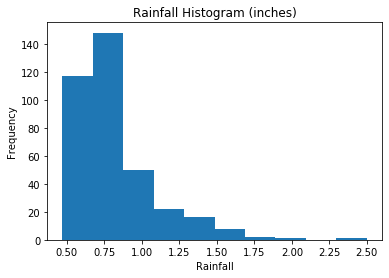

In [15]:
# histogram groups data into bins (value ranges) and displays the number of values that fall into each range as height
plt.title('Rainfall Histogram (inches)')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.hist(rainfall)
plt.show()

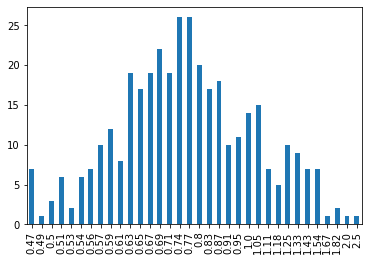

In [16]:
# distribution of daily rain
value_counts = df['Rainfall'].value_counts()    # return a Series containing unique values and their associated counts
sorted_value_counts = value_counts.sort_index() # sort the value counts series in ascending order of value counts
sorted_value_counts.plot.bar()                  # plot the sorted value count Series as a bar plot using matplotlib

In [17]:
sales_mean = df.Sales.mean()
sales_lower_than_mean = df.loc[df.Sales < sales_mean]
print("Number of sales lower than mean:", sales_lower_than_mean['Sales'].size)
print(sales_lower_than_mean.head())
sales_higher_than_mean = df.loc[df.Sales >= sales_mean]
print("Number of sales higher than mean:", sales_higher_than_mean['Sales'].size)
print(sales_higher_than_mean.head())

Number of sales lower than mean: 189
        Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0 2017-01-01     Sunday         27.0      2.00      15    0.3     10
1 2017-01-02     Monday         28.9      1.33      15    0.3     13
2 2017-01-03    Tuesday         34.5      1.33      27    0.3     15
3 2017-01-04  Wednesday         44.1      1.05      28    0.3     17
4 2017-01-05   Thursday         42.4      1.00      33    0.3     18
Number of sales higher than mean: 176
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
91 2017-04-02     Sunday         65.8      0.74      47    0.3     26
92 2017-04-03     Monday         60.8      0.74      51    0.3     26
93 2017-04-04    Tuesday         62.1      0.71      31    0.3     27
94 2017-04-05  Wednesday         64.4      0.71      33    0.3     28
96 2017-04-07     Friday         59.8      0.74      44    0.3     26


## Temperature Statistics

In [18]:
print("Temperature min:",    np.min(temperature))
print("Temperature max:",    np.max(temperature))
print("Temperature mean:",   np.mean(temperature))
print("Temperature median:", np.median(temperature))
print("Temperature std:",    np.std(temperature))
print("Temperature var:",    np.var(temperature))

Temperature min: 15.1
Temperature max: 102.9
Temperature mean: 60.73123287671233
Temperature median: 61.1
Temperature std: 16.174063792872385
Temperature var: 261.6003395759054


In [19]:
temperature_mode = stats.mode(temperature)
print("Temperature stats mode:", temperature_mode)

Temperature stats mode: ModeResult(mode=array([55.9]), count=array([8]))


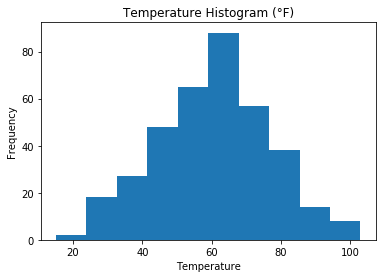

In [20]:
# histogram groups data into bins (value ranges) and displays the number of values that fall into each range as height
plt.title('Temperature Histogram (°F)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.hist(temperature)
plt.show()

## Flyers Statistics

In [21]:
print("Flyers min:",    np.min(flyers))
print("Flyers max:",    np.max(flyers))
print("Flyers mean:",   np.mean(flyers))
print("Flyers median:", np.median(flyers))
print("Flyers std:",    np.std(flyers))
print("Flyers var:",    np.var(flyers))

Flyers min: 9
Flyers max: 80
Flyers mean: 40.28493150684932
Flyers median: 39.0
Flyers std: 13.160585314385774
Flyers var: 173.20100581722647


In [22]:
flyers_mode = stats.mode(flyers)
print("Flyers stats mode:", flyers_mode)

Flyers stats mode: ModeResult(mode=array([28], dtype=int64), count=array([19]))


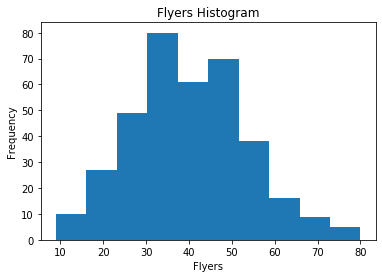

In [23]:
plt.title('Flyers Histogram')
plt.xlabel('Flyers')
plt.ylabel('Frequency')
plt.hist(flyers)
plt.show()

## Price Statistics

In [24]:
print("Price min:",    np.min(price))
print("Price max:",    np.max(price))
print("Price mean:",   np.mean(price))
print("Price median:", np.median(price))
print("Price std:",    np.std(price))
print("Price var:",    np.var(price))

Price min: 0.3
Price max: 0.5
Price mean: 0.33397260273972595
Price median: 0.3
Price std: 0.07510248205641387
Price var: 0.005640382811033967


In [25]:
price_mode = stats.mode(price)
print("Price stats mode:", price_mode)

Price stats mode: ModeResult(mode=array([0.3]), count=array([303]))


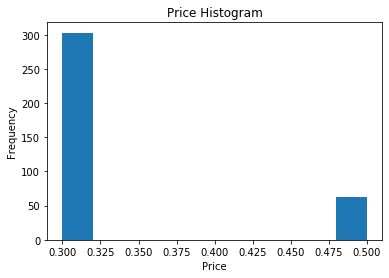

In [26]:
# histogram groups data into bins (value ranges) and displays the number of values that fall into each range as height
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.hist(price)
plt.show()

## Temperature vs Sales

[-0.23749086]
[[0.42061673]]
    Actual  Predicted
0       27  26.724041
1       26  24.915389
2       20  21.634579
3       17  17.470473
4       24  24.242403
..     ...        ...
68      29  28.658878
69      32  32.402367
70      24  25.083636
71      37  35.556992
72      27  27.144658

[73 rows x 2 columns]


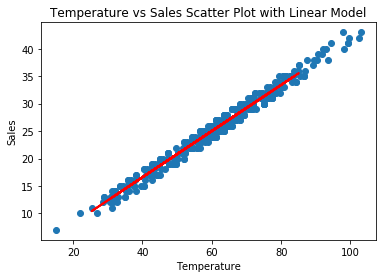

In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(df['Temperature'])
y = pd.DataFrame(df['Sales'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split data up
model = LinearRegression()  # create the linear regression model
model.fit(X_train, y_train) # train the linear regression model
print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X_test)
df_actual_vs_predicted = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
print(df_actual_vs_predicted)

plt.title('Temperature vs Sales Scatter Plot with Linear Model')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.scatter(temperature, sales, marker='o')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()

## Flyers vs Sales

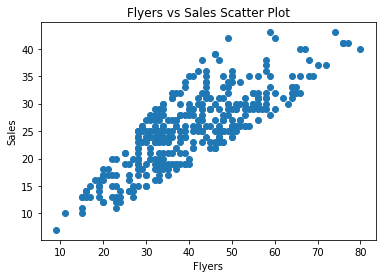

In [28]:
plt.scatter(flyers, sales)
plt.title('Flyers vs Sales Scatter Plot')
plt.xlabel('Flyers')
plt.ylabel('Sales')
plt.show()

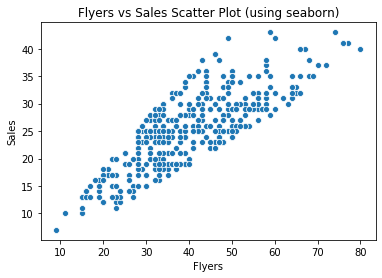

In [29]:
import seaborn as sns # NOTE: inside joke -> Samuel Norman Seaborn (The West Wing)
sns.scatterplot(x='Flyers', y='Sales', data=df)
plt.gca().set_title("Flyers vs Sales Scatter Plot (using seaborn)")
plt.show()

## Rainfall vs Sales

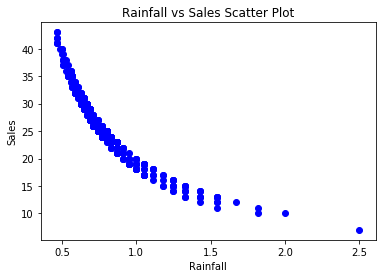

In [30]:
plt.scatter(rainfall, sales, color='b', marker='o')
plt.title('Rainfall vs Sales Scatter Plot')
plt.xlabel('Rainfall')
plt.ylabel('Sales')
plt.show()

## Using ```np.log(rainfall)``` to Partially Linearize Rainfall vs Sales

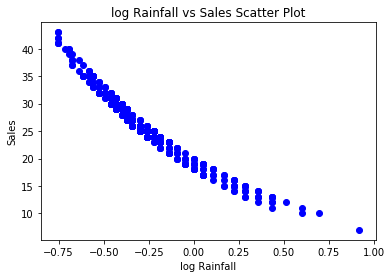

In [31]:
log_rainfall = np.log(rainfall)
plt.scatter(log_rainfall, sales, color='b', marker='o')
plt.title('log Rainfall vs Sales Scatter Plot')
plt.xlabel('log Rainfall')
plt.ylabel('Sales')
plt.show()

## Using ```np.log(rainfall)``` and ```np.log(sales)``` to further Linearize Rainfall vs Sales

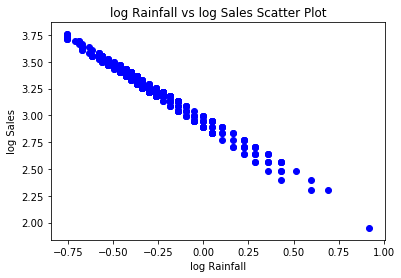

In [32]:
log_rainfall = np.log(rainfall)
log_sales = np.log(sales)
plt.scatter(log_rainfall, log_sales, color='b', marker='o')
plt.title('log Rainfall vs log Sales Scatter Plot')
plt.xlabel('log Rainfall')
plt.ylabel('log Sales')
plt.show()

## Price vs Sales

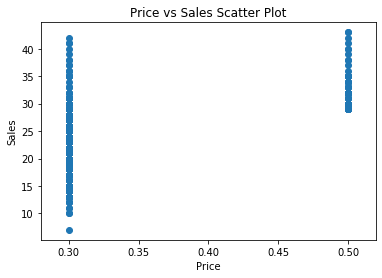

In [33]:
plt.scatter(price, sales)
plt.title('Price vs Sales Scatter Plot')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

## Multiple Subplots

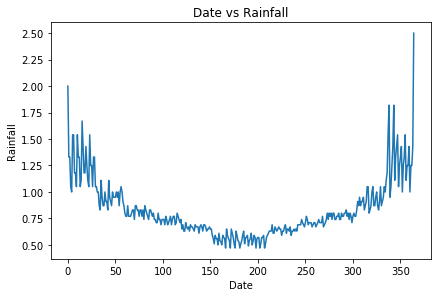

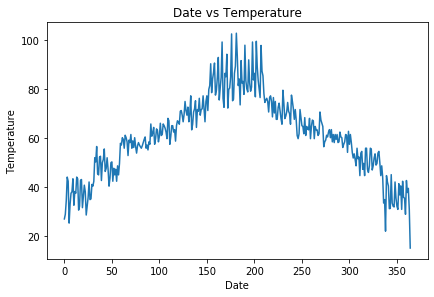

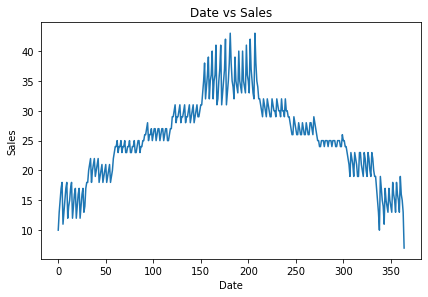

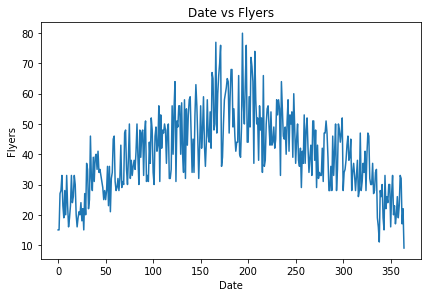

In [34]:
plt.subplot(4,2,1)
df['Rainfall'].plot(figsize=(15,20))
plt.title('Date vs Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.show()

plt.subplot(4,2,2)
df['Temperature'].plot(figsize=(15,20))
plt.title('Date vs Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

plt.subplot(4,2,3)
df['Sales'].plot(figsize=(15,20))
plt.title('Date vs Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

plt.subplot(4,2,4)
df['Flyers'].plot(figsize=(15,20))
plt.title('Date vs Flyers')
plt.xlabel('Date')
plt.ylabel('Flyers')
plt.show()

## Date vs Sales and Date vs Temperature Combined

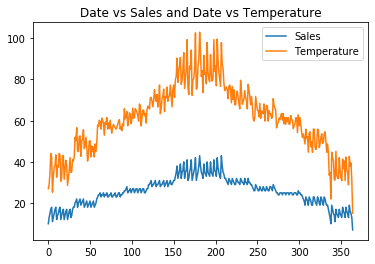

In [35]:
df['Sales'].plot()
df['Temperature'].plot()
plt.legend()
plt.title('Date vs Sales and Date vs Temperature')
plt.show()

In [36]:
print(np.corrcoef(rainfall, temperature)) # correlation coefficient between rainfall and temperature

[[ 1.         -0.90285895]
 [-0.90285895  1.        ]]


In [37]:
print(np.corrcoef(rainfall, sales)) # correlation coefficient between rainfall and sales

[[ 1.         -0.90921393]
 [-0.90921393  1.        ]]


In [38]:
print(np.corrcoef(temperature, sales)) # correlation coefficient between temperature and sales

[[1.         0.98983208]
 [0.98983208 1.        ]]


In [39]:
print(np.corrcoef(flyers, sales)) # correlation coefficient between flyers and sales

[[1.         0.80518258]
 [0.80518258 1.        ]]
